In [61]:
#library for handling dataset
import numpy as np
import pandas as pd
#library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#library for preprocessing & splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#modeling
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
# evaluation
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [62]:
#importing dataset & menampilkan dataset
df = pd.read_csv('/content/Dataset_A_loan.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [63]:
#menampilkan informasi umum mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [64]:
#menampilkan nan pada kolom yang ada di dataset
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,2250
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [65]:
#menampilkan kolom yang memiliki value duplicate, tidak ada
df.duplicated().sum()

np.int64(0)

## EDA & Preprocessing dataset

In [66]:
#mengubah beberapa kolom dari float ke int
df['person_age'] = df.person_age.astype(dtype='int64')
df['loan_amnt'] = df.loan_amnt.astype(dtype='int64')
df['cb_person_cred_hist_length'] = df.cb_person_cred_hist_length.astype(dtype='int64')

In [67]:
#menampilkan informasi mengenai dataset setelah mengubah kolom person_age ke int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [68]:
#menampilkan stats mengenai dataset
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [69]:
#splitting categorical dan numerical dataset
num_col =['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
                            'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'] #numerical column

cat_col = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'] #categorical column

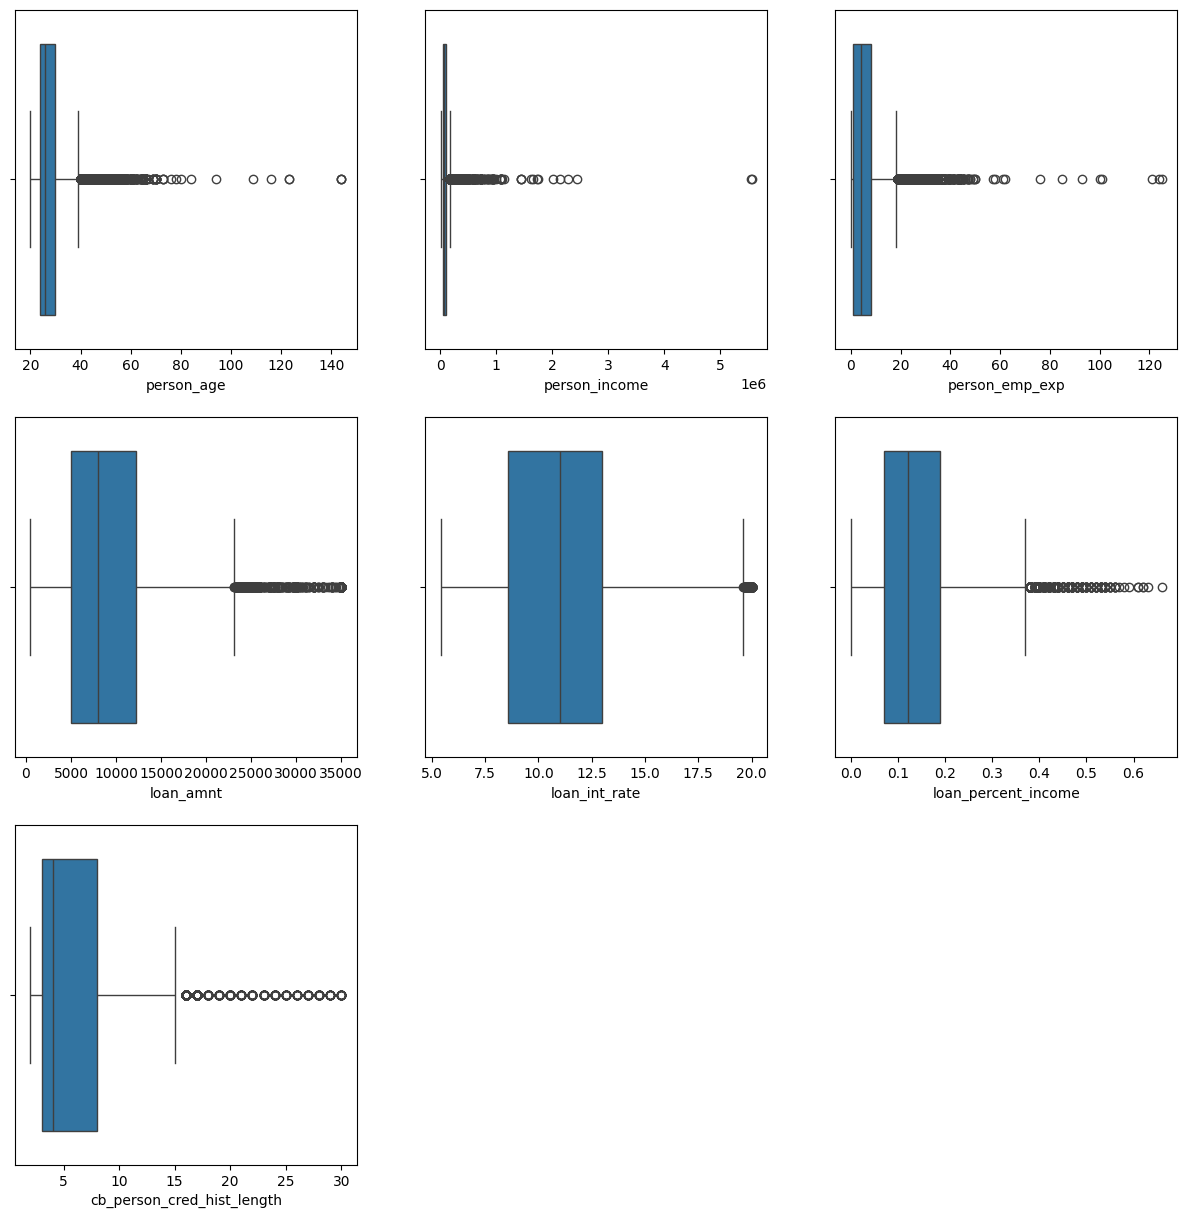

In [70]:
#boxplot for num_cols, menampilkan nilai outlier pada numerical column
plt.figure(figsize=(15, 15))
for i, col in zip(range(1, len(num_col)), df[num_col]):
  plt.subplot(3,3,i)
  sns.boxplot(data = df , x=df[col])
plt.show()

Boxplot ini menggambarkan distribusi dan outlier untuk beberapa kolom dalam dataset. person_age dan person_income menunjukkan distribusi dengan banyak outlier, di mana usia dan pendapatan sangat bervariasi, dengan beberapa nilai ekstrem (misalnya, usia lebih dari 120 tahun dan pendapatan lebih dari 1 juta). person_emp_exp juga menunjukkan adanya outlier, terutama pada pengalaman kerja yang sangat panjang. loan_amnt (jumlah pinjaman) memiliki beberapa outlier di bagian atas, meskipun sebagian besar data terdistribusi lebih terkonsentrasi di sekitar nilai tengah. loan_int_rate (suku bunga pinjaman) dan loan_percent_income menunjukkan distribusi yang lebih terpusat, meskipun ada beberapa outlier yang menunjukkan nilai yang tidak biasa. cb_person_cred_hist_length (panjang riwayat kredit) relatif stabil, meskipun ada beberapa nilai ekstrim. credit_score juga menunjukkan distribusi yang lebih terkonsentrasi dengan beberapa outlier pada nilai kredit yang sangat rendah atau sangat tinggi. Secara keseluruhan, dataset ini memiliki sejumlah besar outlier yang perlu handle lebih lanjut.

## Disini kita mencari tahu apakah datanya itu hanya kesalahan(data entry error, incorrect unit)?, atau memang outlier(sangat ekstrim tapi value nya bener).

### Numerical_Columns

In [71]:
#function untuk deteksi outlier
def detect_outliers(df, num_col, lower_factor=1.5, upper_factor=1.5):
  outlier_data = pd.DataFrame()
  all_outlier_idx = set() #mengtrack outliers pada data

  #looping semua num_col untuk mendeteksi outlier
  for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - lower_factor * IQR
    upper_bound = q3 + upper_factor * IQR

    # Mencari baris yang merupakan outlier, yaitu nilai yang lebih kecil dari lowerbound atau lebih besar dari upperbound
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    all_outlier_idx.update(outliers.index)

    #memisahkan outlier dengan cleaned data
    outlier_data = df.loc[list(all_outlier_idx)]

    if not df.empty:
      print(f"{col}: Min Value = {df[col].min()}, Max Value = {df[col].max()}")
      print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}\n")

  return df, outlier_data

In [72]:
#apply function diatas
df, outlier_data = detect_outliers(df, num_col, 1.5, 1.5)

person_age: Min Value = 20, Max Value = 144
person_age: Lower Bound = 15.0, Upper Bound = 39.0

person_income: Min Value = 8000.0, Max Value = 5556399.0
person_income: Lower Bound = -25563.75, Upper Bound = 168652.25

person_emp_exp: Min Value = 0, Max Value = 125
person_emp_exp: Lower Bound = -9.5, Upper Bound = 18.5

loan_amnt: Min Value = 500, Max Value = 35000
loan_amnt: Lower Bound = -5855.875, Upper Bound = 23093.125

loan_int_rate: Min Value = 5.42, Max Value = 20.0
loan_int_rate: Lower Bound = 1.9899999999999993, Upper Bound = 19.59

loan_percent_income: Min Value = 0.0, Max Value = 0.66
loan_percent_income: Lower Bound = -0.10999999999999999, Upper Bound = 0.37

cb_person_cred_hist_length: Min Value = 2, Max Value = 30
cb_person_cred_hist_length: Lower Bound = -4.5, Upper Bound = 15.5

credit_score: Min Value = 390, Max Value = 850
credit_score: Lower Bound = 497.5, Upper Bound = 773.5



In [73]:
# Menghitung 'person_real_exp' (perubahan: sekarang person_age - person_emp_exp)
df['person_real_exp'] = df['person_age'] - df['person_emp_exp']

# Menggunakan if-else statement untuk menentukan nilai yang akan dipakai dengan threshold 16 dan 85
df['person_real_exp'] = df.apply(
    lambda row: row['person_emp_exp'] if row['person_emp_exp'] <= row['person_age']
    else (row['person_real_exp'] if 16 <= row['person_real_exp'] <= 85 else np.nan),
    axis=1
)

# Menandai outlier atau data yang invalid (nilai kurang dari 16 atau lebih dari 85) dengan status 'invalid'
df['person_real_exp_status'] = df['person_real_exp'].apply(
    lambda x: 'valid' if pd.notna(x) else 'invalid'  # Memeriksa NaN menggunakan pd.notna
)

# Menampilkan beberapa baris untuk memeriksa hasilnya
print(df[['person_emp_exp', 'person_age', 'person_real_exp', 'person_real_exp_status']].tail())

       person_emp_exp  person_age  person_real_exp person_real_exp_status
44995               6          27                6                  valid
44996              17          37               17                  valid
44997               7          33                7                  valid
44998               4          29                4                  valid
44999               1          24                1                  valid


In [74]:
#mereplace missing value dengan median pada kol person_income
df['person_income'] = df['person_income'].fillna(df['person_income'].median())

In [75]:
df.info() #menampilkan dataset baru

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Categorical Columns

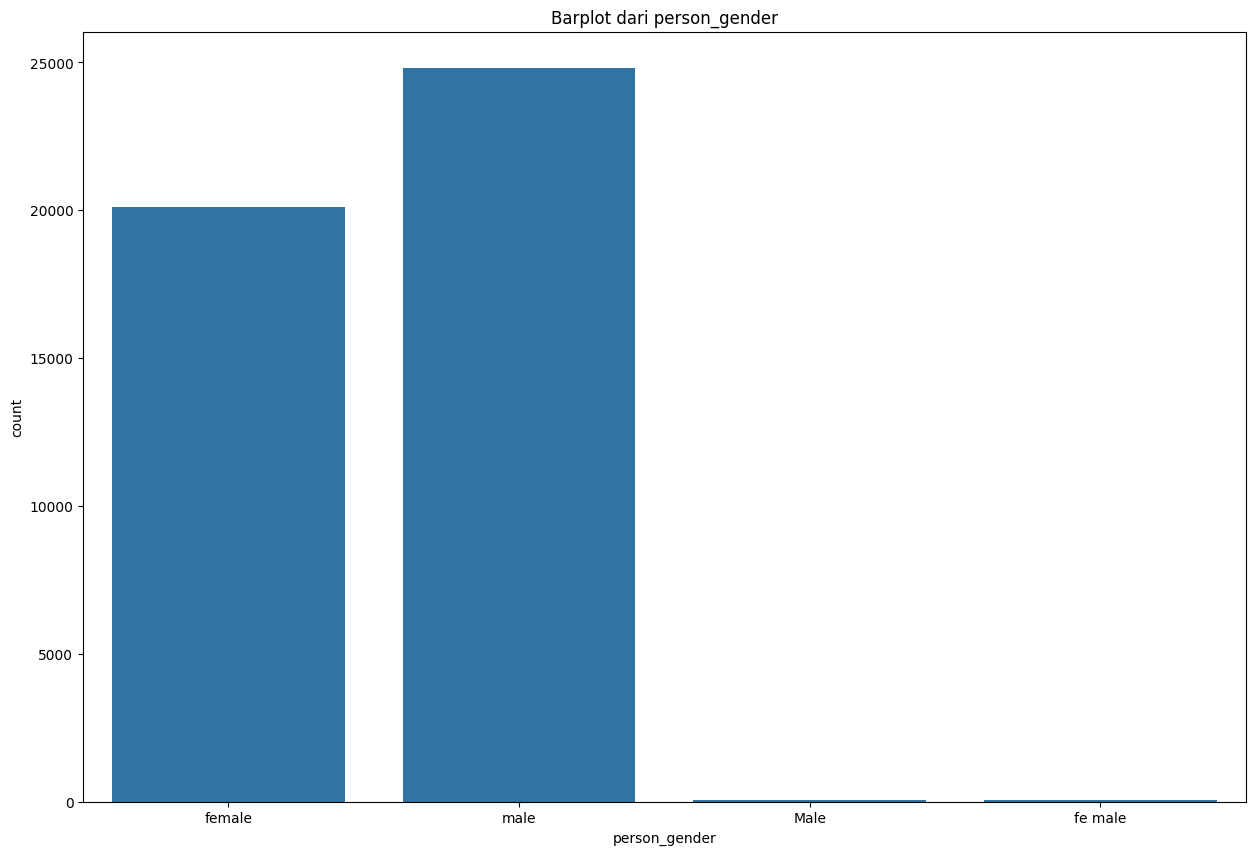

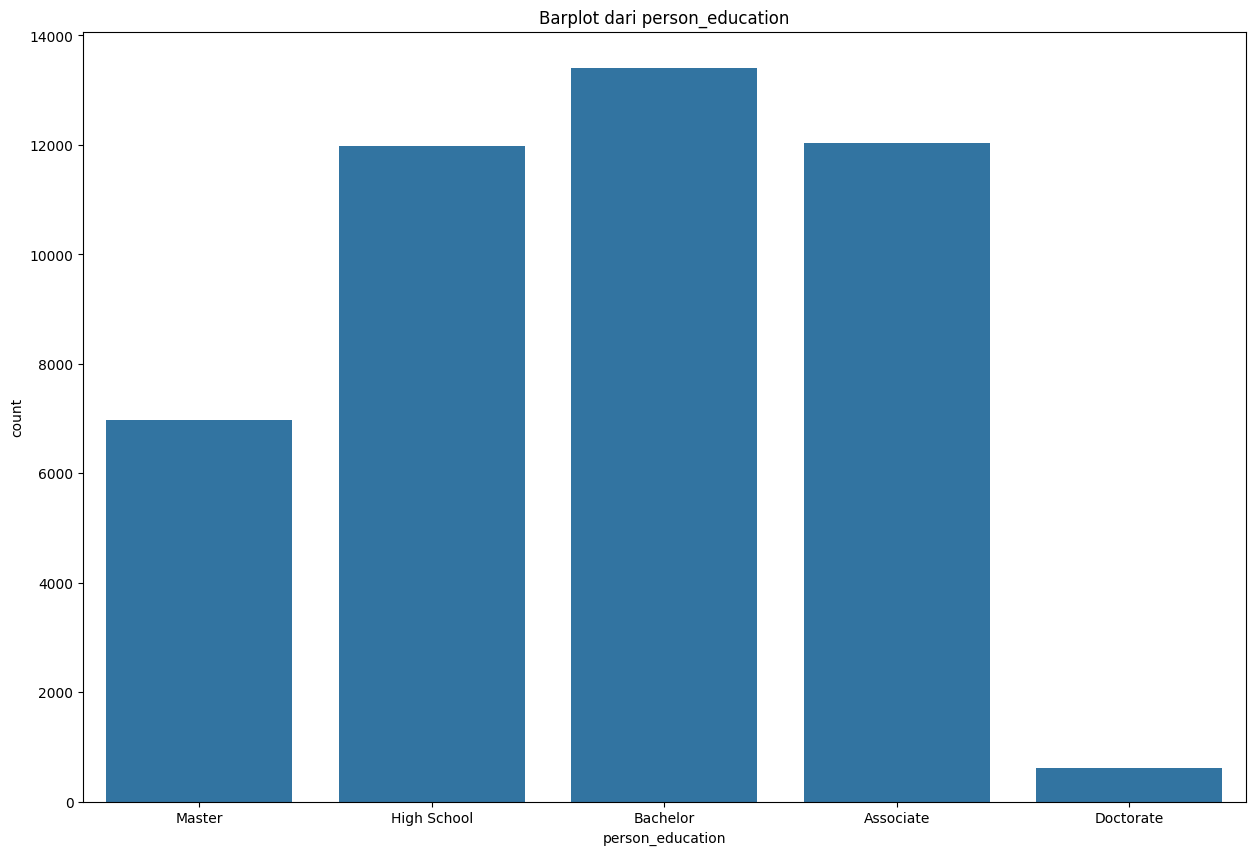

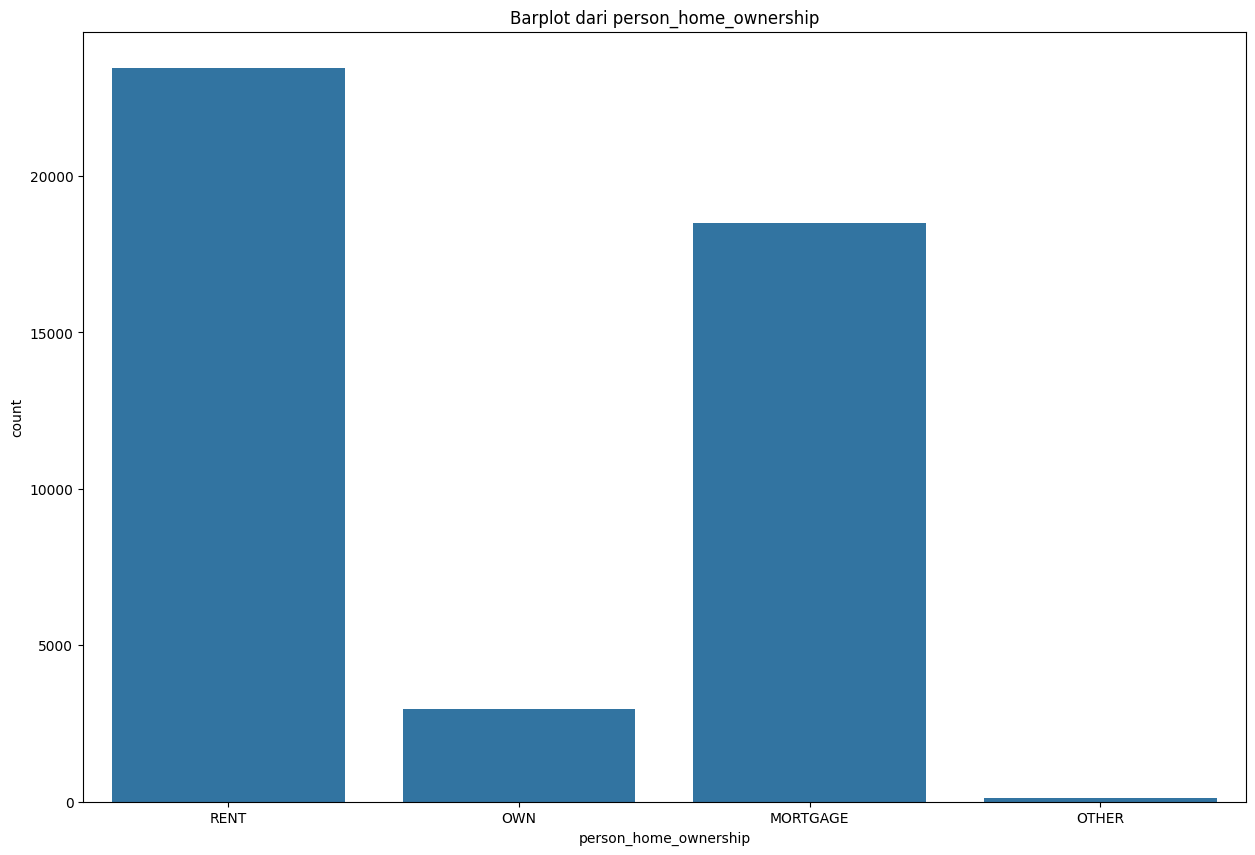

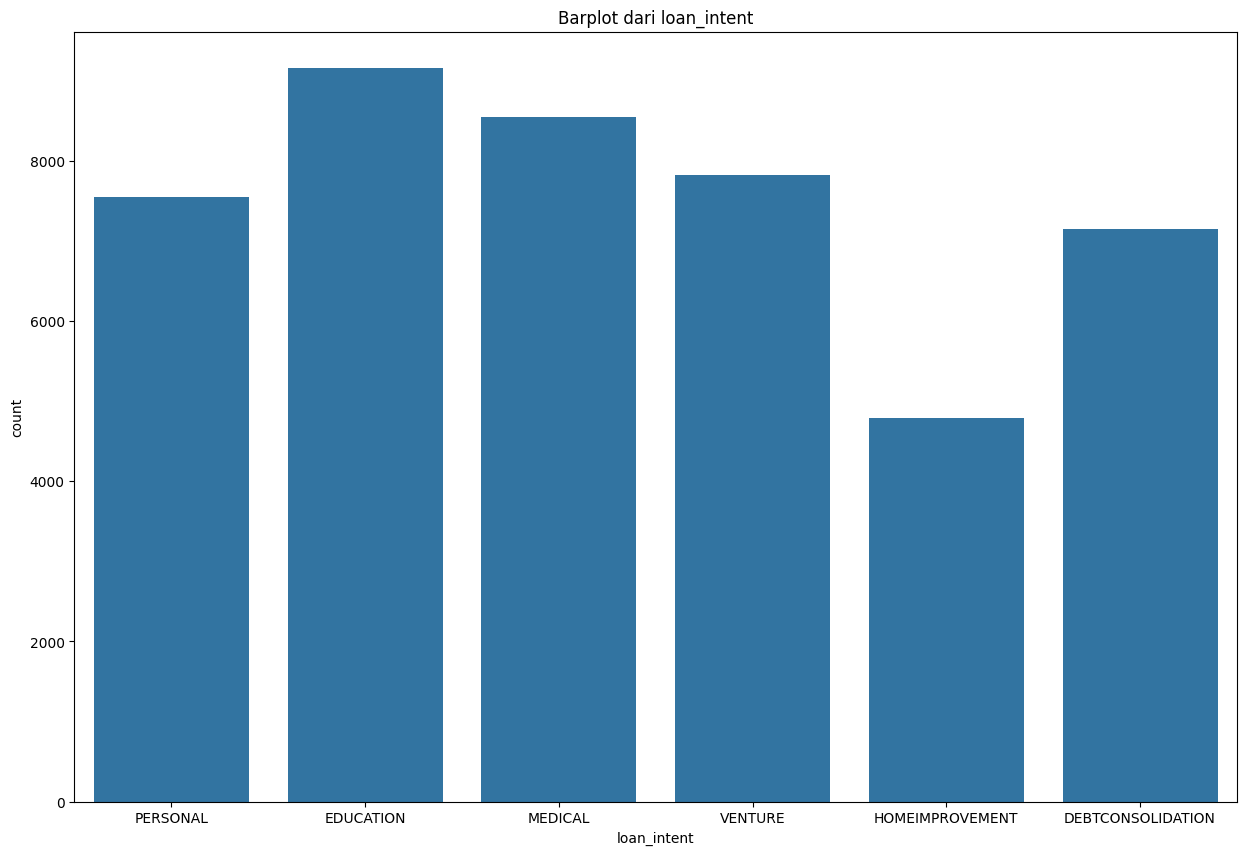

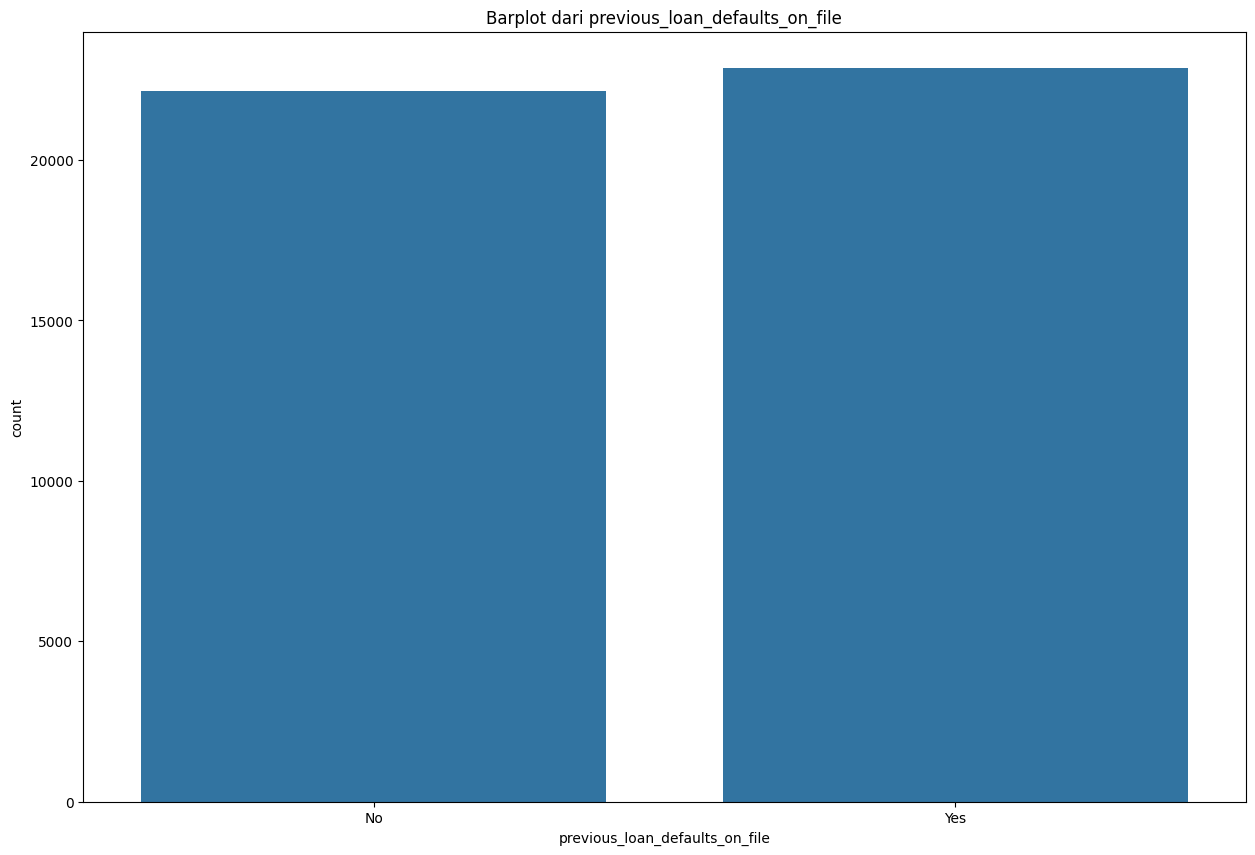

In [76]:
#menampilkan barplot dari categorical_column
for col in cat_col:
  plt.figure(figsize=(15, 10))
  sns.countplot(x=col, data=df)
  plt.title(f'Barplot dari {col}')
  plt.show

In [77]:
# Menampilkan unique val di kolom 'cat_col'
for col in cat_col:
  unique_val = df[col].unique()
  print(f'Unique Value pada {col}: {unique_val}')

  #menapilkan setiap unique val pada cat_col
  cat_val_count = df[col].value_counts()
  print(f'Value Counts pada {col}:\n{cat_val_count}\n')

Unique Value pada person_gender: ['female' 'male' 'Male' 'fe male']
Value Counts pada person_gender:
person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64

Unique Value pada person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Value Counts pada person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Unique Value pada person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Value Counts pada person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Unique Value pada loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Value Counts pada loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOL

analisa ini menunjukan adanya unique value distribution dan frequency nya pada bbrapa categorical column. Pada col person_gender,terdapat perbedaan pada penulisan ("male" dan "Male", serta "female" dan "fe male") yang menyebabkan adanya variansi data. Anomali seperti Male dan fe male muncul masing' 45 kali. Sisa dari categorical column memiliki value distribution yang normal.

In [78]:
#membuat column baru yang berisikan nilai fe male dan Male yang distore ke female dan male
df['cleaned_real_gender'] = df['person_gender'].replace({'fe male': 'female', 'Male': 'male'})
df[['person_gender', 'cleaned_real_gender']].head()

,person_gender,cleaned_real_gender
0,female,female
1,female,female
2,female,female
3,female,female
4,male,male


In [79]:
# Menampilkan DataFrame yang baru
# digabungkan person_real_exp, person_real_exp_status, cleaned_real_gender
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_real_exp,person_real_exp_status,cleaned_real_gender
0,22,female,Master,71948.0,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1,0,valid,female
1,21,female,High School,12282.0,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0,0,valid,female
2,25,female,High School,12438.0,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1,3,valid,female
3,23,female,Bachelor,79753.0,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1,0,valid,female
4,24,male,Master,66135.0,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1,1,valid,male


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## One-Hot Encoding

In [100]:
#menggunakan one hot encoding untuk col categorical yang memiliki category lebih dari 2
df_encoded = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership',
                                         'loan_intent', 'previous_loan_defaults_on_file', 'cleaned_real_gender'], drop_first=True)
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_real_exp,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,cleaned_real_gender_male
0,22,71948.0,0,35000,16.02,0.49,3,561,1,0,...,False,False,True,False,False,False,True,False,False,False
1,21,12282.0,0,1000,11.14,0.08,2,504,0,0,...,False,True,False,True,False,False,False,False,True,False
2,25,12438.0,3,5500,12.87,0.44,3,635,1,3,...,False,False,False,False,False,True,False,False,False,False
3,23,79753.0,0,35000,15.23,0.44,2,675,1,0,...,False,False,True,False,False,True,False,False,False,False
4,24,66135.0,1,35000,14.27,0.53,4,586,1,1,...,False,False,True,False,False,True,False,False,False,True


## Splitting data x and y

In [102]:
x = df_encoded.drop(columns=['loan_status', 'loan_percent_income'], axis=1) #menghapus kolom yg tidak digunakan di x
y = df_encoded['loan_status'] #target column

#splitting data mjd traindata dan testdata
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

## Label Encoding

In [104]:
#label encoding untuk categorical column dgn 2 category
binary_cols = ['loan_status', 'person_real_exp_status'] #memilih column loan_status
label_encoder = LabelEncoder()
for col in binary_cols:
  df[col] = label_encoder.fit_transform(df[col])

print(df[['loan_status', 'person_real_exp_status']].head()) #menampilkan col loan_status setelah di label encode

   loan_status  person_real_exp_status
0            1                       0
1            0                       0
2            1                       0
3            1                       0
4            1                       0


## Scalling dataset

In [108]:
#filtering only numerical column for scaling
scaler = StandardScaler()
scaling_numcol = xtrain.select_dtypes(include=['float64', 'int64']).columns
xtrain[scaling_numcol] = scaler.fit_transform(xtrain[scaling_numcol])
xtest[scaling_numcol] = scaler.transform(xtest[scaling_numcol])

xtrain.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,cb_person_cred_hist_length,credit_score,person_real_exp,person_real_exp_status,person_gender_fe male,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,cleaned_real_gender_male
25180,1.039475,0.230476,0.931186,0.859025,0.577910,0.816732,-0.032444,0.931186,0.0,False,...,False,False,False,False,False,False,True,False,False,False
12555,-0.456186,-0.169519,-0.395014,0.383393,0.286925,-0.478914,0.524687,-0.395014,0.0,False,...,False,False,True,False,False,False,False,True,True,True
29153,2.202767,3.213982,2.091610,2.285919,-0.211430,1.334990,1.002227,2.091610,0.0,False,...,False,False,False,False,False,False,True,False,True,False
23838,-0.123817,0.190318,-0.229239,0.002888,2.052907,0.298474,0.166531,-0.229239,0.0,False,...,False,False,True,True,False,False,False,False,False,True
35686,-0.123817,-0.169519,0.268086,-0.399971,0.658182,-0.738043,1.459871,0.268086,0.0,False,...,False,False,True,False,True,False,False,False,True,True


## Classification Model Random Forrest

In [110]:
#build model random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain) #train model dgn traindata
y_pred_rf = rf_model.predict(xtest) #predict pada testdata

# Model Evaluation menggunakan akurasi, confusion matrix, dan classification report
print("Random Forest Accuracy:", accuracy_score(ytest, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(ytest, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(ytest, y_pred_rf))

Random Forest Accuracy: 0.9225555555555556
Confusion Matrix (Random Forest):
 [[6769  221]
 [ 476 1534]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



Classification report ini menjelaskan adanya akurasi model sebesar 92,26% yg artinya model berhasil mengklasifikasikan datanya.
Confussion matrix menunjukan bahwa model menghasilkan 6769 True Negatives (TN) dan 1534 True Positives (TP), sementara 221 False Positives (FP) dan 476 False Negatives (FN). Dalam precision, model lebih baik dalam mengklasifikasikan kelas 0 (0.93 vs. 0.87 untuk kelas 1), namun dalam recall, model lebih berhasil mendeteksi kelas 0 (0.97) dibandingkan kelas 1 (0.76). Secara keseluruhan, model menunjukkan performa yang baik dengan f1-score lebih tinggi untuk kelas 0 (0.95) dibandingkan kelas 1 (0.81).

## Classification Model XGBoost

In [111]:
#build model XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(xtrain, ytrain) #train model
y_pred_xgb = xgb_model.predict(xtest) #prediction on data test

# Model Evaluation menggunakan akurasi, confusion matrix, dan classification report
print("XGBoost Accuracy:", accuracy_score(ytest, y_pred_xgb))
print("Confusion Matrix (XGBoost):\n", confusion_matrix(ytest, y_pred_xgb))
print("Classification Report (XGBoost):\n", classification_report(ytest, y_pred_xgb))

XGBoost Accuracy: 0.9272222222222222
Confusion Matrix (XGBoost):
 [[6750  240]
 [ 415 1595]]
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.87      0.79      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



Classification report ini menjelaskan adanya akurasi model sebesar 92,72% yg artinya model berhasil mengklasifikasikan datanya.Sedikit lebih bagus dari Random Forest.Confussion matrixnya berisikan 6750 True Negatives (TN) dan 1595 True Positives (TP), dengan 240 False Positives (FP) dan 415 False Negatives (FN). Model memiliki precision yang baik untuk kelas 0 (0.94) dan kelas 1 (0.87), serta recall yang lebih tinggi untuk kelas 0 (0.97) dibandingkan kelas 1 (0.79). f1-score untuk kelas 0 adalah 0.95, lebih tinggi dibandingkan kelas 1 (0.83), yang menunjukkan bahwa model bekerja lebih baik dalam mendeteksi kelas 0. Secara keseluruhan, XGBoost menunjukkan kinerja yang sangat baik dengan weighted average f1-score 0.93.